In [19]:
import glob
from PIL import Image, ImageOps
from skimage import io, transform
from preprocessing.image_preprocess import open_image, transform_img, remove_border_1, remove_border_2, pad_to_square, resize
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_name = "../all_train/4/3412_right.jpeg"
size = 400
image = image_0 = open_image(img_name)
image = transform_img(image, remove_border_1)
image = pad_to_square(image)
image = resize(image, size)
# image 


In [9]:
image.size

(405, 405)

In [10]:

preprocess = transforms.Compose([
    transforms.Resize([400, 400]),
#     transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


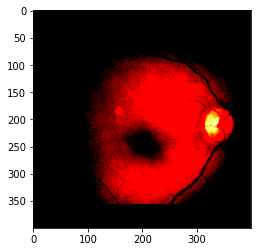

In [11]:
# z = input_tensor.numpy()*255
# z = z.reshape(
plt.imshow(input_tensor.permute(1, 2, 0))

In [12]:
input_tensor.permute(1, 2, 0).shape

torch.Size([400, 400, 3])

In [13]:
image2.size

NameError: name 'image2' is not defined

In [46]:
# !pip install opencv-python
# !pip install scikit-image

In [47]:
# !pip install torchvision

In [48]:
# image2

In [96]:

image3.size
# image3

(3888, 3888)

In [98]:
# image3

In [50]:
img = image2
# img

In [52]:
# pil_image = Image.open('image.jpg')
img = np.array(image2)

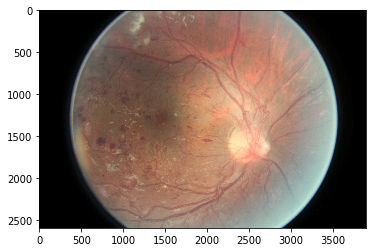

In [53]:

plt.imshow(img)

In [58]:
img.size

30233088

In [62]:
scale = 300

In [64]:
x = img[img.shape[0] // 2, :, :].sum(1)
r = (x > x.mean() / 10).sum() / 2
s = scale * 1.0 / r

In [66]:
img2 = cv2.resize(img, (0,0), fx = s , fy = s)

In [67]:
img2.shape

(472, 709, 3)

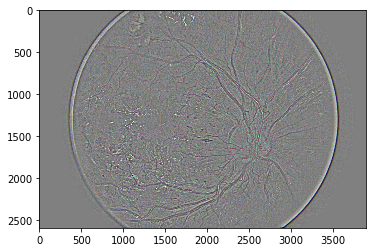

In [79]:
plt.imshow(img2)

In [87]:
img.shape

(2592, 3888, 3)

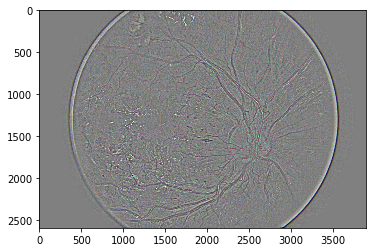

In [86]:
a = img
img2 = cv2.addWeighted(a, 4, cv2.GaussianBlur(a, (0, 0), scale / 30), -4, 128 )
plt.imshow(img2)

In [94]:
b.shape
scale = 1500

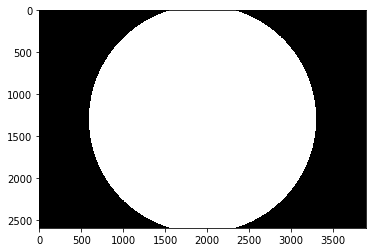

In [95]:
b = np.zeros(a.shape)
cv2.circle(b,(a.shape[1] // 2, a.shape[0] // 2), int(scale * 0.9),(1, 1, 1), -1, 8, 0)
plt.imshow(b)
# a = a * b + 128 * (1 - b)
a = a * b 
a= a.astype(int)

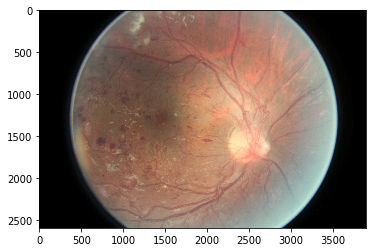

In [92]:
plt.imshow(a)

In [18]:

def scaleRadius(img,scale):
    x = img[img.shape[0] // 2, :, :].sum(1)
    r = (x > x.mean() / 10).sum() / 2
    s = scale * 1.0 / r
    return cv2.resize(img, (0,0), fx = s , fy = s)

def preprocess_eye(f, scale = 300):
    try:
        # scale = 300
        a = cv2.imread(f)

        a = scaleRadius(a,scale)
        
        #substract local average colour
        a = cv2.addWeighted(a, 4, cv2.GaussianBlur(a, (0, 0), scale / 30), -4, 128 )
        
        # remove 10% outer part of image
        b = np.zeros(a.shape)
        cv2.circle(b,(a.shape[1] // 2, a.shape[0] // 2), int(scale * 0.9),(1, 1, 1), -1, 8, 0)
        # a = a * b + 128 * (1 - b)
        a = a * b 
        return a.astype(int)
    except:
        print("Error at:", f)
        return None
